In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 31.9 MB/s eta 0:00:00


In [ ]:
!ls ./src_orignal

ls: cannot access './src_orignal': No such file or directory


In [ ]:
!unzip ./src_original.zip

Archive:  ./src_original.zip
   creating: src_original/
  inflating: src_original/break_1.avi  
  inflating: src_original/break_2.avi  
  inflating: src_original/break_3.avi  
  inflating: src_original/break_4.avi  
  inflating: src_original/break_5.avi  
  inflating: src_original/break_6.avi  
  inflating: src_original/break_7.avi  
  inflating: src_original/break_8.avi  
  inflating: src_original/break_9.avi  
  inflating: src_original/break_10.avi  
  inflating: src_original/break_11.avi  
  inflating: src_original/break_12.avi  
  inflating: src_original/break_13.avi  
  inflating: src_original/break_14.avi  
  inflating: src_original/break_15.avi  
  inflating: src_original/break_16.avi  
  inflating: src_original/break_17.avi  
  inflating: src_original/break_18.avi  
  inflating: src_original/break_19.avi  
  inflating: src_original/break_20.avi  
  inflating: src_original/break_21.avi  
  inflating: src_original/break_22.avi  
  inflating: src_original/break_23.avi  
  inflatin

In [ ]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
import numpy as np
import os
import asyncio
from mediapipe.framework.formats import landmark_pb2
from keras.utils import to_categorical
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
MAX_FRAMES = 120

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

directory = "./src_original"
file_names = os.listdir(directory)
file_list = [
    file for file in file_names if os.path.isfile(os.path.join(directory, file))
]
print(file_list)

['stand_1.avi', 'stand_14.avi', 'evening_31.avi', 'stand_39.avi', 'sit_27.avi', 'sit_33.avi', 'stand_19.avi', 'break_39.avi', 'stand_31.avi', 'break_28.avi', 'stand_17.avi', 'sit_5.avi', 'evening_12.avi', 'evening_41.avi', 'sit_38.avi', 'stand_29.avi', 'sit_12.avi', 'sit_29.avi', 'sit_23.avi', 'stand_37.avi', 'sit_16.avi', 'sit_35.avi', 'break_7.avi', 'sit_26.avi', 'sit_40.avi', 'evening_27.avi', 'evening_32.avi', 'sit_20.avi', 'stand_7.avi', 'evening_22.avi', 'sit_36.avi', 'evening_42.avi', 'sit_7.avi', 'evening_19.avi', 'break_35.avi', 'stand_40.avi', 'stand_36.avi', 'sit_6.avi', 'sit_21.avi', 'stand_33.avi', 'break_6.avi', 'evening_1.avi', 'evening_37.avi', 'break_40.avi', 'break_2.avi', 'evening_35.avi', 'break_26.avi', 'break_27.avi', 'evening_11.avi', 'evening_15.avi', 'sit_9.avi', 'break_37.avi', 'stand_20.avi', 'evening_10.avi', 'evening_26.avi', 'evening_36.avi', 'evening_33.avi', 'stand_9.avi', 'evening_2.avi', 'stand_25.avi', 'break_19.avi', 'stand_10.avi', 'stand_28.avi', '

In [ ]:
data_x = np.zeros(shape=(len(file_list), MAX_FRAMES, 12))
data_y = np.zeros(shape=(len(file_list), MAX_FRAMES, 12))


targets_names = list(set([file_name.split('_')[0] for file_name in file_names]))
targets_indexes = dict()

for i, targets_name in enumerate(targets_names):
    targets_indexes[targets_name] = i

print(targets_indexes)

targets = np.zeros(shape=(len(file_list)))

{'break': 0, 'stand': 1, 'sit': 2, 'evening': 3}


In [ ]:
video_index = 0
frame_index = 0


def get_coodinates(file_list, video_index):
    global data_x
    global data_y

    cap = cv2.VideoCapture('src_original/' + file_list[video_index])
    targets[video_index] = targets_indexes[file_list[video_index].split('_')[0]]

    frame_index = 0

    while True:
            ret, frame = cap.read()
            # print(ret)
            if ret and frame_index < MAX_FRAMES:
                RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = pose.process(RGB)


                data_x[video_index, frame_index, :] = [
                data_point.x for data_point in results.pose_landmarks.landmark[11:23]
                ]

                data_y[video_index, frame_index, :] = [
                data_point.y for data_point in results.pose_landmarks.landmark[11:23]
                ]

                frame_index += 1
                # print(frame_index)

                #  From now onwards, Just to show the frame - No need
                myFrozenObject = frozenset({(4, 10), (5, 9), (7, 9), (3, 5),  (4, 6), (5, 11), (0, 2), (4, 8), (5, 7), (1, 3), (6, 8),  (2, 4)})


                landmark_subset = landmark_pb2.NormalizedLandmarkList(
                    landmark = results.pose_landmarks.landmark[11:23]
                    )

                blank_frame = np.zeros_like(frame)

                line_drawing_spec = mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=25, circle_radius=1)

                # Customize the landmark drawing specifications for joints
                joint_drawing_spec = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=25, circle_radius=2)

                # Draw landmarks on the blank frame with custom specifications
                mp_drawing.draw_landmarks(blank_frame, landmark_subset, myFrozenObject, landmark_drawing_spec=line_drawing_spec, connection_drawing_spec=joint_drawing_spec)


                # output_video.write(blank_frame)
                # imgplot = plt.imshow(blank_frame)
                # plt.show()


            else:
                break



In [ ]:
def make_dataset():
    for i, file_name in enumerate(file_list):
        get_coodinates(file_list, i)

make_dataset()
# get_coodinates(file_list, 0)

print(data_x)


[[[0.66700304 0.38549647 0.69687557 ... 0.31714809 0.70356679 0.32922107]
  [0.66738576 0.38543391 0.69693828 ... 0.31682742 0.70419276 0.32908466]
  [0.66762817 0.38534766 0.6966669  ... 0.31656739 0.70429695 0.32903698]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.62229884 0.3480891  0.65045732 ... 0.30579478 0.60797477 0.31371033]
  [0.61624092 0.34654436 0.64375281 ... 0.30989468 0.59658146 0.31687263]
  [0.61363035 0.34609547 0.64144003 ... 0.31263244 0.59272683 0.31916299]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.63163823 0.36756143 0.65369469 ... 0.35382202 0.63048321 0.36216676]
  [0.63493544 0.370413

In [ ]:
targets_cat = to_categorical(targets)
print(targets.shape)
print(targets_cat.shape)

(162,)
(162, 4)


In [ ]:
# Divide into train and validation
TRAINSETSIZE = 120

random_indexes= np.random.permutation(152)

data_x_shuffled = data_x[random_indexes]
data_y_shuffled = data_y[random_indexes]
targets_shuffled = targets_cat[random_indexes]

data_x_train = data_x_shuffled[0:TRAINSETSIZE]
data_y_train = data_y_shuffled[0:TRAINSETSIZE]
targets_train = targets_shuffled[0:TRAINSETSIZE]

data_x_test = data_x_shuffled[TRAINSETSIZE:]
data_y_test = data_y_shuffled[TRAINSETSIZE:]
targets_test  = targets_shuffled[TRAINSETSIZE:]

print(data_x_test.shape, data_x_train.shape, targets_test.shape, targets_train.shape)


(32, 120, 12) (120, 120, 12) (32, 4) (120, 4)


In [ ]:
from keras.models import Model
from keras import layers
from keras import Input

x_input = Input(shape=(MAX_FRAMES, 12), dtype='float32', name='x_coods')
encoded_x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x_input)
encoded_x = layers.Bidirectional(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))(encoded_x)

y_input = Input(shape=(MAX_FRAMES, 12), dtype='float32', name='y_coods')
encoded_y = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(y_input)
encoded_y = layers.Bidirectional(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))(encoded_y)

concatenated = layers.concatenate([encoded_x, encoded_y], axis=-1)

pred = layers.Dense(64, activation='relu')(concatenated)
pred = layers.Dropout(.2)(pred)
pred = layers.Dense(64, activation='relu')(pred)
pred = layers.Dropout(.2)(pred)
pred = layers.Dense(128, activation='relu')(pred)
pred = layers.Dropout(.2)(pred)
pred = layers.Dense(128, activation='relu')(pred)
pred = layers.Dense(4, activation='softmax')(pred)

model= Model([x_input, y_input], pred)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 x_coods (InputLayer)           [(None, 120, 12)]    0           []                               
                                                                                                  
 y_coods (InputLayer)           [(None, 120, 12)]    0           []                               
                                                                                                  
 bidirectional_2 (Bidirectional  (None, 120, 128)    39424       ['x_coods[0][0]']                
 )                                                                                                
                                                                                                  
 bidirectional_4 (Bidirectional  (None, 120, 128)    39424       ['y_coods[0][0]']          

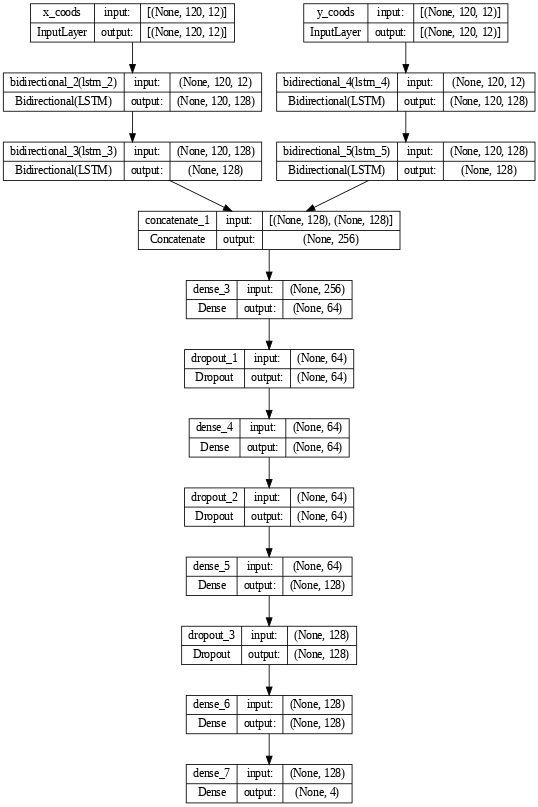

In [ ]:
plot_model(model, expand_nested=True, dpi=60, show_shapes=True)

In [ ]:
history = model.fit([data_x_train, data_y_train], targets_train, epochs=50, validation_data=([data_x_test, data_y_test], targets_test))

Epoch 1/50
4/4 [==============================] - 40s 5s/step - loss: 1.3892 - acc: 0.2083 - val_loss: 1.3891 - val_acc: 0.2500
Epoch 2/50
4/4 [==============================] - 16s 4s/step - loss: 1.3879 - acc: 0.2250 - val_loss: 1.3759 - val_acc: 0.2812
Epoch 3/50
4/4 [==============================] - 18s 5s/step - loss: 1.3836 - acc: 0.2250 - val_loss: 1.3533 - val_acc: 0.4375
Epoch 4/50
4/4 [==============================] - 16s 4s/step - loss: 1.3594 - acc: 0.3167 - val_loss: 1.3241 - val_acc: 0.3750
Epoch 5/50
4/4 [==============================] - 16s 4s/step - loss: 1.3104 - acc: 0.3667 - val_loss: 1.5126 - val_acc: 0.2188
Epoch 6/50
4/4 [==============================] - 17s 4s/step - loss: 1.3928 - acc: 0.3333 - val_loss: 1.3072 - val_acc: 0.2812
Epoch 7/50
4/4 [==============================] - 17s 4s/step - loss: 1.2872 - acc: 0.4333 - val_loss: 1.2944 - val_acc: 0.2812
Epoch 8/50
4/4 [==============================] - 16s 4s/step - loss: 1.2681 - acc: 0.3750 - val_loss: 1

In [ ]:
import matplotlib.pyplot as plt

def plotHist(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

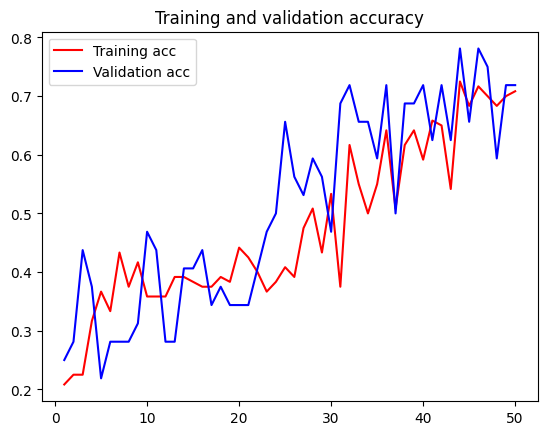

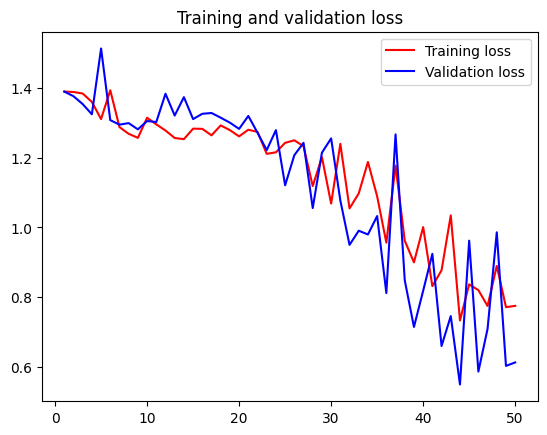

In [ ]:
plotHist(history)

1/1 [==============================] - 2s 2s/step
(32, 4)
[[ 6  1  1  0]
 [ 1  4  1  1]
 [ 3  0  3  0]
 [ 1  0  0 10]]


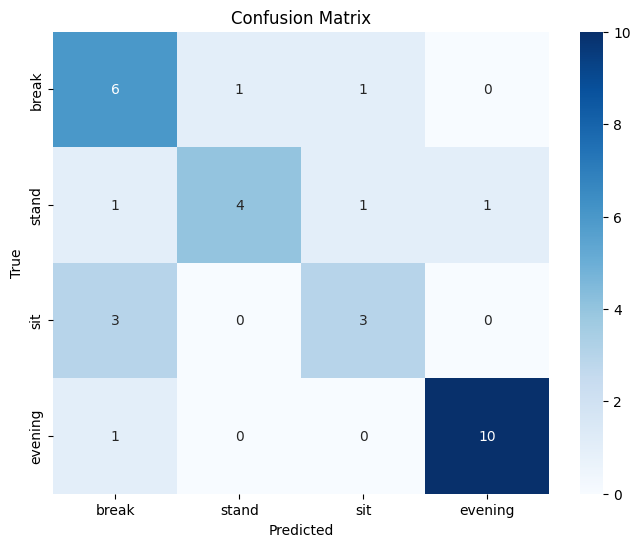

In [ ]:

predicted_probabilities = model.predict([data_x_test, data_y_test])
print(targets_test.shape)
# Convert probabilities to class labels by taking the argmax
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Convert one-hot encoded target labels to class labels
true_labels = np.argmax(targets_test, axis=1)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print(confusion_mat)
class_names = list(targets_indexes.keys())
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()